<a href="https://colab.research.google.com/github/anywallsocket/Code/blob/main/Python_Magnet_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here I will demonstrate the first lab's Python requirements,<br>
in a different way than what has been offered by Adam.

First of course we need to import our libraries <br>
For this we just need numpy for math, and matplotlib for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Secondly, we need to load in our data. <br>
To the left we can upload files, for this version I expect csv or txt files. <br> You should be able to export your data from excel or google sheets into a csv file. <br>

In [2]:
earth_data = np.genfromtxt('Before.csv', delimiter=',')
earth_mag_data = np.genfromtxt('After.csv', delimiter=',')
earth_data

array([[         nan,          nan,          nan,          nan,
                 nan],
       [  0.1642565 , -19.02776337,  -5.67255402, -35.6912384 ,
         40.84235726],
       [  0.1742655 , -19.02776337,  -5.67255402, -35.6912384 ,
         40.84235726],
       ...,
       [  5.61762492, -19.2078476 ,  -5.63870239, -35.49925232,
         40.75454931],
       [  5.62763492, -19.2078476 ,  -5.63870239, -35.49925232,
         40.75454931],
       [  5.63761392, -19.17770386,  -5.63013077, -35.35035706,
         40.60948709]])

In [3]:
#printing the first row will print the variable names
earth_data[0]

array([nan, nan, nan, nan, nan])

What I've done above is used numpy's genfromtxt function to load in the data as floats (numbers with decimals), note that this means the variable labels (e.g., time, x, y, z, etc) are 'nan', which is OK, so long as I understand how the data is formatted -- you can load it into excel to figure that out.
<br> However, I already know the data is structerd as [[time, x, y, z, amp]]

In [4]:
#In python we can use what's called 'slicing' to access arrays easily
time = earth_data[1:,0]
#This roughly translates to: grab all rows, starting from the first
#(and therefore skipping the nan at earth[0], within the first column

>If you've already removed your variable labels, just remove the 1's before the colon within the slices like this: earth_data[1:,0] $→$ earth_data[:,0]

In [5]:
time

array([0.1642565 , 0.1742655 , 0.1842755 , 0.1942855 , 0.2042955 ,
       0.2142745 , 0.2242845 , 0.2342935 , 0.2443035 , 0.2543135 ,
       0.2643235 , 0.2743325 , 0.2843125 , 0.2943215 , 0.3043315 ,
       0.3143415 , 0.3243515 , 0.3343615 , 0.3443705 , 0.3543505 ,
       0.3643595 , 0.3743695 , 0.3843795 , 0.3943895 , 0.4043985 ,
       0.4144085 , 0.4243875 , 0.4343975 , 0.4444075 , 0.4544175 ,
       0.4644265 , 0.4744365 , 0.4844465 , 0.4944565 , 0.5044355 ,
       0.5144455 , 0.5244555 , 0.5344645 , 0.5444745 , 0.5544845 ,
       0.5644945 , 0.5744735 , 0.5844835 , 0.5944925 , 0.6045025 ,
       0.6145125 , 0.6245225 , 0.6345315 , 0.6445115 , 0.6545205 ,
       0.6645305 , 0.6745405 , 0.6845505 , 0.6945605 , 0.7045695 ,
       0.7145795 , 0.7245585 , 0.73453738, 0.74454738, 0.75455737,
       0.76456638, 0.77457637, 0.78458638, 0.79456538, 0.80457537,
       0.81458537, 0.82459437, 0.83460437, 0.84461438, 0.85462437,
       0.86460337, 0.87461338, 0.88462337, 0.89463238, 0.90464

Above I've printed the first column, which is time. <br>
So, knowing the structure, I can proceed and collect all my important variables. <br> HOWEVER my data is probably of different lengths
since my 'before' and 'after' measurments were of different durations.


In [6]:
earth_x = earth_data[1:,1]
earth_mag_x = earth_mag_data[1:,1]
print(len(earth_x), len(earth_mag_x))

546 568


My earth data is 546 rows adn my earth+mag data has 568 <br>
We can sort this out later while plotting or just fix it now. <br>
What I'll do is slice the first 500 points from both, <br>
therefore they'll both be the same size, and so our plots will be pretty :)

In [7]:
#first grab the 'before' data which is just the earth's magnetic field
dt = 501 #grab the first 500 data points (minus the nan variabl name)

time = earth_data[1:dt,0]
earth_x = earth_data[1:dt,1]
earth_y = earth_data[1:dt,2]
earth_z = earth_data[1:dt,3]
earth_amp = earth_data[1:dt,4]

#then grab the 'after' data, which is the earth's field, plus the magnet
earth_mag_x = earth_mag_data[1:dt,1]
earth_mag_y = earth_mag_data[1:dt,2]
earth_mag_z = earth_mag_data[1:dt,3]
earth_mag_amp = earth_mag_data[1:dt,4]

print(len(earth_x), len(earth_mag_x))

500 500


As you can see, now they're all 500 points each! <br>
Ok, let's test them out with some plots

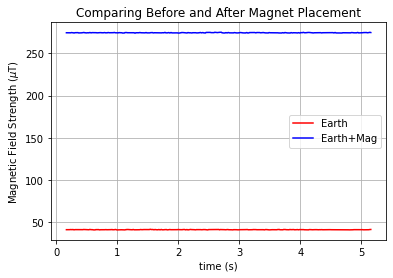

In [8]:
#Matplotlib's plot works like plt.plot(x, y, etc.)
plt.plot(time, earth_amp, c='r', label='Earth')
plt.plot(time, earth_mag_amp, c='b', label='Earth+Mag')
plt.xlabel('time (s)')
plt.ylabel('Magnetic Field Strength ($\mu$T)')
plt.title('Comparing Before and After Magnet Placement')
plt.legend(); plt.grid()
plt.show()

Feel free to play around with the plot to make it pretty. <br>
Obviously we see that adding the magnet increased the field by a significant amount.

Now let's say we want to do some of the required math. <br>
That is, calculating the means, standard uncertainties. <br>
Also, we have to subtract the 'before' and 'after' to find the magnet's own field. <br> As well as the directions and magnitudes.

In [9]:
#Numpy can easily do most of this
mean_earth_x = np.mean(earth_x)
mean_earth_x

-19.205113952859996

In [10]:
#We can do this for each component to find the average vector
earth_xyz = [np.mean(x) for x in [earth_x, earth_y, earth_z]]
earth_xyz

[-19.205113952859996, -5.794818817176, -35.590405304]

This means the vector of the Earth's magnetic field, relative to the phone's magnetometer, is <br>

$earth = (-19.2, -5.8, -35.6)$

Which can also be written as

$earth = -19.2\hat x -5.8\hat y - 35.6\hat z$

Or, as you'll sometimes see, in terms of unit vectors (ijk)

$earth = -19.2\hat i -5.8\hat j - 35.6\hat k$

These all mean basically the same thing: they tell you the direction of the vector.

For the magnitudes, we can also use Numpy

In [11]:
mean_earth_x = np.mean(earth_x)
mean_earth_y = np.mean(earth_y)
mean_earth_z = np.mean(earth_z)

x_mag = np.sqrt(mean_earth_x**2+mean_earth_y**2+mean_earth_z**2)
x_mag

40.85453801928528

Let's compare that to what the app has given us.

In [12]:
#Note that mag has meant magnet not magnitude, and mean = average
mean_earth_amp = np.mean(earth_amp)
mean_earth_amp

40.85525964056

Not bad. The app probably uses a rolling average, so it's a bit different.

The uncertainty of a data set is the standard deviation divided by the sqrt of the number of data points. <br>

<br>$\mu=σ*N^{1/2}$

In [13]:
#The standard deviation has a complicated form, but we can use Numpy

std_earth_amp = np.std(earth_amp)
std_earth_amp

0.12325739477917241

A small standard deviation makes sense looking at how steady the data was. <br>
For the uncertainty then, we just need to divide by the sqrt of the number of points.

In [14]:
unc_earth_amp = std_earth_amp/np.sqrt(dt)
unc_earth_amp

0.005506734285446909

Remeber dt = 500, which is equivalent to how many data points are in the array.
<br> A super low uncertainty makes sense for two reasons:
* because the standard deviation is small (numerator)
* because the number of data points is large (denomenator)

The only thing I have yet to demonstrate is the vector subtraction.
That is easy enough.

In [15]:
diff_x = earth_mag_x - earth_x
diff_y = earth_mag_y - earth_y
diff_z = earth_mag_z - earth_z

mean_diff_x = np.mean(diff_x)
mean_diff_y = np.mean(diff_y)
mean_diff_z = np.mean(diff_z)

[mean_diff_x, mean_diff_y, mean_diff_z]

[-195.89925781074, -159.20538473522402, -7.735063629120001]

*Voila!* 
<br> This means our magnet, by itself, has the vector

magnet = (earth+magnet) - earth
<br><br>
$\bar {magnet} = -196\hat x -159\hat y - 8\hat z$

> It's important to interpret your results!
What I did was put a small magnet right *above* my phone.
You can see the z component is tiny, because the magnet was in the x-y plane with the phone.

Note that the amplitude of the difference cannot be calculated simply as the difference of the amplitudes, but rather needs to account for each component.

In [16]:
wrong_mean_diff_amp = np.mean(earth_mag_amp) - np.mean(earth_amp)

right_mean_diff_amp = np.sqrt(
    
    (np.mean(earth_mag_x) - np.mean(earth_x))**2
    +
    (np.mean(earth_mag_y) - np.mean(earth_y))**2
    +
    (np.mean(earth_mag_z) - np.mean(earth_z))**2
)

print(wrong_mean_diff_amp, right_mean_diff_amp)

233.68451555503998 252.55238060417486


In [17]:
#Note as well that we can take the mean of each component before hand
#As we just did, or take it after calculating the amplitude
#This works because Python is smart, and so can operate on entire arrays

mag_amp = np.sqrt(
    (earth_mag_x - earth_x)**2
    +
    (earth_mag_y - earth_y)**2
    +
    (earth_mag_z - earth_z)**2
)

np.mean(mag_amp)

252.55255414779455

Finally I'll just plot the results

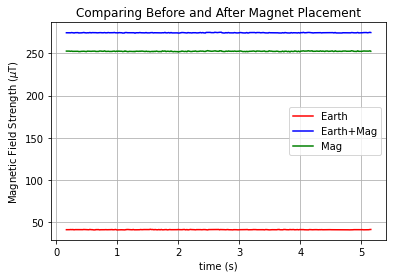

In [18]:
plt.plot(time, earth_amp, c='r', label='Earth')
plt.plot(time, earth_mag_amp, c='b', label='Earth+Mag')
plt.plot(time, mag_amp, c='g', label='Mag')
plt.xlabel('time (s)')
plt.ylabel('Magnetic Field Strength ($\mu$T)')
plt.title('Comparing Before and After Magnet Placement')
plt.legend(); plt.grid()
plt.show()

**That's that!**